# Machine Learning on Histopathological Dataset for Breast Cancer
Dataset from [Kaggle](https://www.kaggle.com/c/histopathologic-cancer-detection/data)

## Getting dataset from google drive


Uploaded dataset at [Google Drive](https://drive.google.com/open?id=18YKz4OtbmQ0hZC67lOcoJ4mxR1liT4hu)

### Mounting Google drive

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Extracting data from drive

In [0]:
import zipfile

zip_dir = '/content/drive/My Drive/Datasets/histopathologic-cancer-detection.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')
zip_ref.extractall('/tmp/histo/')
zip_ref.close()

### Rearranging data and directories


In [0]:
train_zip_dir = '/tmp/histo/train.zip'
test_zip_dir = '/tmp/histo/test.zip'

train_zip_ref = zipfile.ZipFile(train_zip_dir, 'r')
train_zip_ref.extractall('/tmp/histo/train/')
train_zip_ref.close()

test_zip_ref = zipfile.ZipFile(test_zip_dir, 'r')
test_zip_ref.extractall('/tmp/histo/test/')
test_zip_ref.close()

In [0]:
!rm /tmp/histo/test.zip
!rm /tmp/histo/train.zip

Read the tabel of labelled filenames

In [0]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

histo_dataframe = pd.read_csv('/tmp/histo/train_labels.csv')

histo_dataframe = histo_dataframe.reindex(
    np.random.permutation(histo_dataframe.index))
histo_dataframe

,id,label
64695,eb706e1890f3529454bbcfae414536ec292f1bac,1
206512,2d514666917fbffdf3490a7b5c19be6d6433b24b,1
87443,258b1b148d4fe99329bb140a22d00eff1c23ae1e,0
78942,ff4b050dc2980d10518fddb3bb6c6ea22a3b9971,0
205609,936f57cfe64e95bf02f960912306057238c1a66f,1
...,...,...
206954,edda223945423fb73e1d9964266bdd87c61761ce,0
15266,ae2a1977bde5a13c71b7a7d93c8e78d9e22d4d89,0
82859,a5a18b0d7501754fbd1b299a7086d0587ce1d22a,1
7780,ab7c96ae2620b6430351204227e8da60196bc3e0,0


Getting split lengths for training data for 70-30 train-val splits

In [0]:
train_percentage = 70.0
total_len = len(histo_dataframe)
train_len = int(total_len * 0.7)
val_len = total_len - train_len

In [0]:
train_benign_names = list()
train_malignant_names = list()
for i in histo_dataframe.head(train_len).index:
  if (histo_dataframe['label'][i] == 0):
    train_benign_names.append(histo_dataframe['id'][i] + ".tif")
  else: 
    train_malignant_names.append(histo_dataframe['id'][i] + ".tif")


val_benign_names = list()
val_malignant_names = list()
for i in histo_dataframe.tail(val_len).index:
  if (histo_dataframe['label'][i] == 0):
    val_benign_names.append(histo_dataframe['id'][i] + ".tif")
  else: 
    val_malignant_names.append(histo_dataframe['id'][i] + ".tif")

move around the files in the right order

In [0]:
!mkdir /tmp/histo/train/train/
!mkdir /tmp/histo/train/train/benign/
!mkdir /tmp/histo/train/train/malignant/

!mkdir /tmp/histo/train/val/
!mkdir /tmp/histo/train/val/benign/
!mkdir /tmp/histo/train/val/malignant/

move data from extracted directory into designated directories

In [0]:
import os

base_dir = '/tmp/histo/train'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

val_benign_dir = os.path.join(val_dir, 'benign')
val_malignant_dir = os.path.join(val_dir, 'malignant')

for fname in train_benign_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(train_benign_dir, fname))

for fname in train_malignant_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(train_malignant_dir, fname))

for fname in val_benign_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(val_benign_dir, fname))

for fname in val_malignant_names:
  os.rename(os.path.join(base_dir, fname), os.path.join(val_malignant_dir, fname))

In [0]:
base_dir  = '/dataset'

## Displaying some slices

Benign


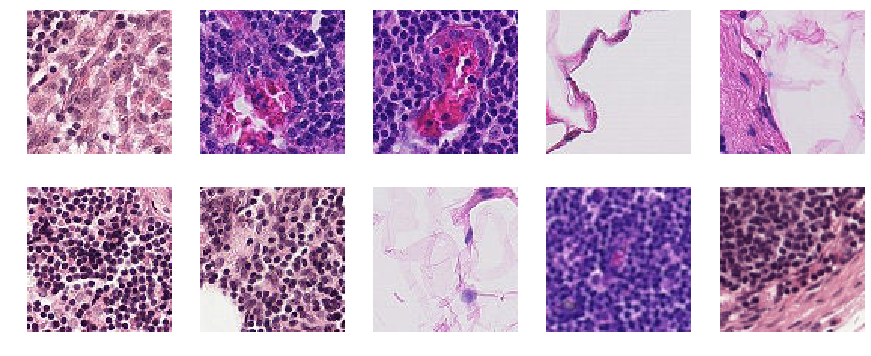

Malignant


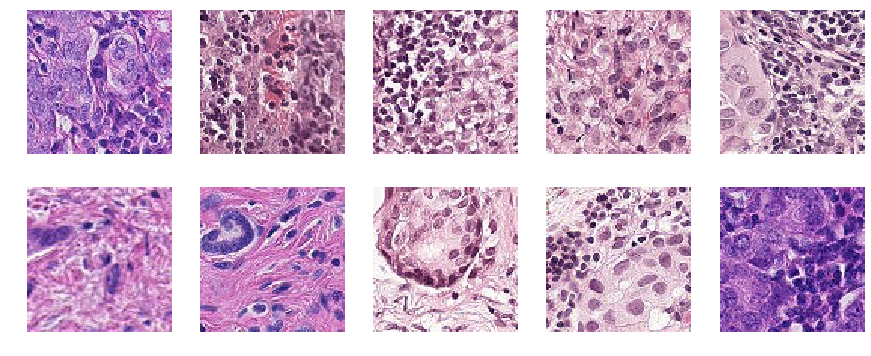

In [0]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

images_per_class = 10

print("Benign")

plt.figure(figsize=(15,6))
for i in range(1, images_per_class + 1):
  plt.subplot(2, 5, i)
  plt.axis('off')
  selected_img = np.random.choice(os.listdir(val_benign_dir))
  plt.imshow(mpimg.imread(os.path.join(val_benign_dir, selected_img)))

plt.show()
print("Malignant")

plt.figure(figsize=(15,6))
for i in range(1, images_per_class + 1):
  plt.subplot(2, 5, i)
  plt.axis('off')
  selected_img = np.random.choice(os.listdir(val_malignant_dir))
  plt.imshow(mpimg.imread(os.path.join(val_malignant_dir, selected_img)))

## Preprocessing and Loading data

Creating data generators for easy augmentation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add augmentation over here
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 100

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary')



Found 154017 images belonging to 2 classes.
Found 66008 images belonging to 2 classes.


# Standard (In Progress: Model tweaking)

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adagrad, SGD

In [0]:
def get_training_metrics(model, history, optimizer,learning_rate, steps_per_epoch, total_epochs, validation_steps, batch_size):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  # Getting certain evaluation metrics: GET THE ROC CURVE

  evaluation_metrics = model.evaluate()

  plt.plot(epochs, acc, label="Training")
  plt.plot(epochs, val_acc, label="Validation")
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, label="Training")
  plt.plot(epochs, val_loss, label="Validation")
  plt.title('Training and validation loss')
  plt.legend()

  print(total_epochs)
  optimizer_name = optimizer.get_config()['name']
  print("- O=%s, LR=%f, BS=%02d, SPE=%02d, E=%02d, VS=%02d" %
        (optimizer_name,
         learning_rate,
         batch_size,
         steps_per_epoch,
         total_epochs,
         validation_steps))
  
  
  print(">final train loss: %.3f<br>\nfinal validation loss: %.3f<br>\nfinal train accuracy: %.3f<br>\nfinal validation accuracy: %.3f<br>" % 
        (loss[-1], 
         val_loss[-1], 
         acc[-1], 
         val_acc[-1]))

## Building and compiling the architecture

In [0]:
img_input = layers.Input(shape=(100, 100, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

standard_model = Model(img_input, output)

standard_model.summary()

W0828 11:31:03.377928 140579040012160 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0     

## Fitting data on the model

Fitting trials on above architecture: 
- Split=70-30, BS=30, SPE=500, E=30, VS=100, O=Adagrad, LR=0.0001
> final train loss: 0.529 <br>
final validation loss: **8.325** <br>
final train accuracy: 0.741 <br>
final validation accuracy: **0.456** <br>
Possible Cause: The data generator was scaling by 1/.255

- Split=70-30, BS=30, SPE=500, E=30, VS=250, O=Adagrad, LR=0.0001
> final train loss: 0.546 <br>
final validation loss: 0.533 <br>
final train accuracy: 0.745 <br>
final validation accuracy: 0.744 <br>
Unstable learning with sharp ridges in learning curves

- Split=70-30, BS=100, SPE=1600, E=30, VS=250, O=SGD, LR=0.0001
> final train loss: 9.1188<br>
final train accuracy: 0.4053<br>
final validation loss: 9.1340<br>
final validation accuracy: 0.4043

- Split=70-30, BS=100, SPE=100, E=15, VS=250, O=?, LR=?
>final train loss: 0.629<br>
final validation loss: 0.614<br>
final train accuracy: 0.646<br>
final validation accuracy: 0.663

- Split=70-30, BS=100, SPE=100, E=20, VS=600, O=SGD, LR=0.0005
>final train loss: 0.554<br>
final validation loss: 0.537<br>
final train accuracy: 0.729<br>
final validation accuracy: 0.752

- Split=70-30, BS=100, SPE=100, E=30, VS=600, O=SGD, LR=0.0001
>final train loss: 0.622<br>
final validation loss: 0.613<br>
final train accuracy: 0.636<br>
final validation accuracy: 0.605

**Changing the architecture => Adding 2 more convolution and max pooling layers**

- Split=70-30, BS=100, SPE=100, E=30, VS=600, O=SGD, LR=0.001
> final trainloss: 0.5367<br>
final validationloss: 0.5335<br>
final training accuracy: 0.7540<br>
final validation accuracy: 0.7365

**Changing the architecture => "Evolution"**

- Split=70-30, BS=100, SPE=100, E=30, VS=600, O=SGD, LR=0.0001
>final train loss: 0.685<br>
final validation loss: 0.686<br>
final train accuracy: 0.601<br>
final validation accuracy: 0.596

- O=SGD, LR=0.000500, BS=100, SPE=150, E=30, VS=600
>final train loss: 0.672<br>
final validation loss: 0.670<br>
final train accuracy: 0.592<br>
final validation accuracy: 0.595<br>





In [0]:
learning_rate = 0.0005
steps_per_epoch = 150
epochs = 30
validation_steps = 600
optimizer=SGD(learning_rate=learning_rate)

In [0]:
standard_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['acc'])

history = standard_model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=val_generator,
    validation_steps=validation_steps
)

W0828 11:31:03.712469 140579040012160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
150/150 [==============================] - 150s 1s/step - loss: 0.6917 - acc: 0.5410 - val_loss: 0.6906 - val_acc: 0.5956
Epoch 2/30
150/150 [==============================] - 58s 389ms/step - loss: 0.6891 - acc: 0.5899 - val_loss: 0.6884 - val_acc: 0.5956
Epoch 3/30
150/150 [==============================] - 56s 372ms/step - loss: 0.6886 - acc: 0.5816 - val_loss: 0.6869 - val_acc: 0.5956
Epoch 4/30
150/150 [==============================] - 55s 367ms/step - loss: 0.6863 - acc: 0.5953 - val_loss: 0.6854 - val_acc: 0.5956
Epoch 5/30
150/150 [==============================] - 56s 372ms/step - loss: 0.6852 - acc: 0.5939 - val_loss: 0.6842 - val_acc: 0.5956
Epoch 6/30
150/150 [==============================] - 57s 380ms/step - loss: 0.6833 - acc: 0.5985 - val_loss: 0.6830 - val_acc: 0.5956
Epoch 7/30
150/150 [==============================] - 57s 379ms/step - loss: 0.6822 - acc: 0.5988 - val_loss: 0.6819 - val_acc: 0.5956
Epoch 8/30
150/150 [==============================] - 58s

In [0]:
get_training_metrics(
    history,
    optimizer,
    learning_rate,
    steps_per_epoch,
    epochs,
    validation_steps,
    batch_size)

TypeError: ignored

# Inception-V3 (In Progress: Model Tweaking)


## Setting up pretrained model for tailoring

### Loading the pre-trained model

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(100, 100, 3),
    include_top=False,
    weights=None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
pre_trained_model.summary()

## Freezing and customizing the architecture

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed4')
print('Last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.4)(x)

x = layers.Dense(1, activation='sigmoid')(x)

inception_model = Model(pre_trained_model.input, x)


In [0]:
inception_model.summary()

## Fitting the data on the model

- O=SGD, LR=0.000100, BS=100, SPE=150, E=30, VS=600
>final train loss: 0.514<br>
final validation loss: 0.508<br>
final train accuracy: 0.760<br>
final validation accuracy: 0.771<br>

- O=SGD, LR=0.000100, BS=100, SPE=150, E=30, VS=600
>final train loss: 0.521<br>
final validation loss: 0.517<br>
final train accuracy: 0.756<br>
final validation accuracy: 0.759<br>

### The Knobs and Toggles

In [0]:
learning_rate = 0.0001
steps_per_epoch = 150
epochs = 30
validation_steps = 600
optimizer=SGD(learning_rate=learning_rate)

In [0]:
inception_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['acc'])


history = inception_model.fit_generator(
    generator=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=1,
    validation_data=val_generator,
    validation_steps=validation_steps
)

### History

In [0]:
get_training_metrics(
    inception_model,
    history, 
    optimizer,
    learning_rate, 
    steps_per_epoch, 
    epochs, 
    validation_steps, 
    batch_size
    )